In [15]:
from joblib import load
from sklearn.preprocessing import StandardScaler
import numpy as np

face_data = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/olivetti_faces_400_64x64.joblib")
X = face_data["data"]
y = face_data["target"]

ss = StandardScaler()
X_ss = ss.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca_99 = pca.fit_transform(X_ss)
nbs =int(np.ceil(np.sqrt(np.shape(X_pca_99[1]))))
pca_sqr = PCA(n_components=nbs**2)
X_pca_sqr = pca_sqr.fit_transform(X)
X_pca_sqr_ss = pca_sqr.fit_transform(X_ss)


print("Input: ",np.shape(X))
print("Output ss: ",np.shape(X_ss))
print("Output pca raw 99%: ",np.shape(X_pca_99))
print("Output pca: ",np.shape(X_pca_sqr))
print("Output pca ss: ",np.shape(X_pca_sqr_ss))



Input:  (400, 4096)
Output ss:  (400, 4096)
Output pca raw 99%:  (400, 260)
Output pca:  (400, 289)
Output pca ss:  (400, 289)


c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

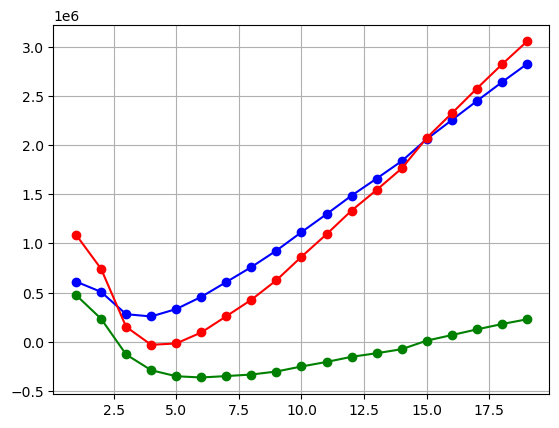

In [16]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

range_1 = range(1,20,1)

bics = np.array([])
aics = np.array([])

for k in range_1:
    gmix = GaussianMixture(n_components=k, n_init=5)
    gmix.fit(X_pca_99)
    bics = np.append(bics, gmix.bic(X_pca_99))
    aics = np.append(aics, gmix.aic(X_pca_99))

b_and_a_ics = bics + aics

plt.plot(range_1,bics,"bo-")
plt.plot(range_1,aics,"go-")
plt.plot(range_1,b_and_a_ics,"ro-")
plt.grid(True)
#plt.gca().set_ylim(0,1.1)
plt.show()



c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


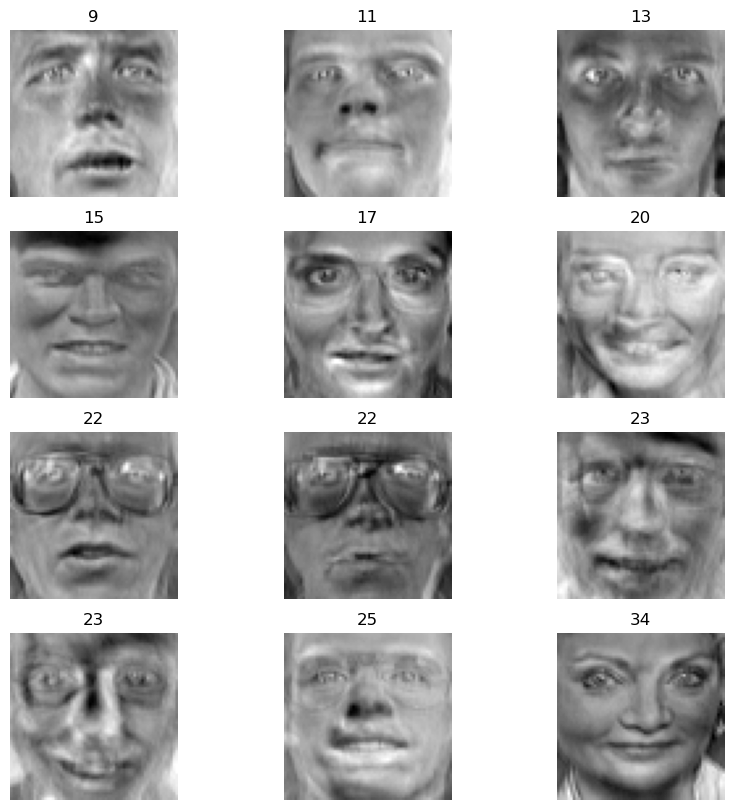

In [27]:
def plot_faces(faces, labels, n_cols=3):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(10, 10)) #(n_cols, n_rows * 1.1)
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

gmix1 = GaussianMixture(n_components=40)
y_pred = gmix1.fit_predict(X_pca_99)

gen_faces_reduced, y_gen_faces = gmix1.sample(n_samples=12)
gen_faces = pca.inverse_transform(gen_faces_reduced)

plot_faces(gen_faces, y_gen_faces)